In [1]:
%matplotlib inline
import qiskit
from qiskit import *
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

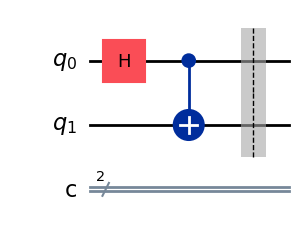

In [2]:
qc=QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.barrier()
qc.draw("mpl")

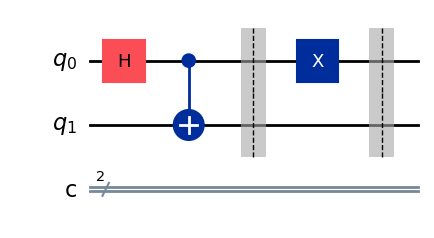

In [3]:
def alice_bits(qc, bit):
    # Define mapping of bits to Qiskit methods
    gate_map = {
        'i': lambda: qc.i(0),
        'x': lambda: qc.x(0),
        'z': lambda: qc.z(0),
        'xz': lambda: (qc.x(0), qc.z(0))
    }
    
    # Apply the gate if valid
    if bit in gate_map:
        gate_map[bit]()  # Run the corresponding gate
    else:
        raise ValueError(f"Invalid gate: {bit}")
    
    qc.barrier()

alice_bits(qc, "x")
qc.draw("mpl")

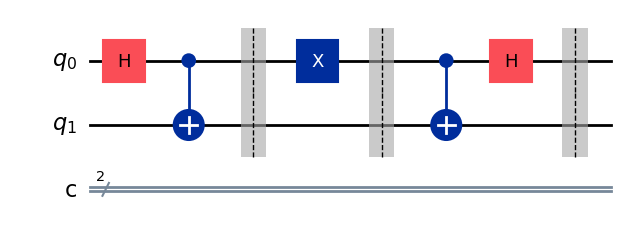

In [4]:
qc.cx(0,1)
qc.h(0)
qc.barrier()
qc.draw("mpl")

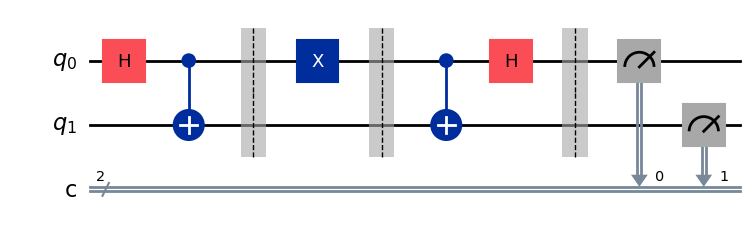

In [5]:
qc.measure([0,1],[0,1])
qc.draw("mpl")

In [6]:
backend=AerSimulator(method='automatic')
circuit=transpile(qc,backend)
job = backend.run(circuit, shots=1024)
result = job.result()

Measurement results: {'10': 1024}


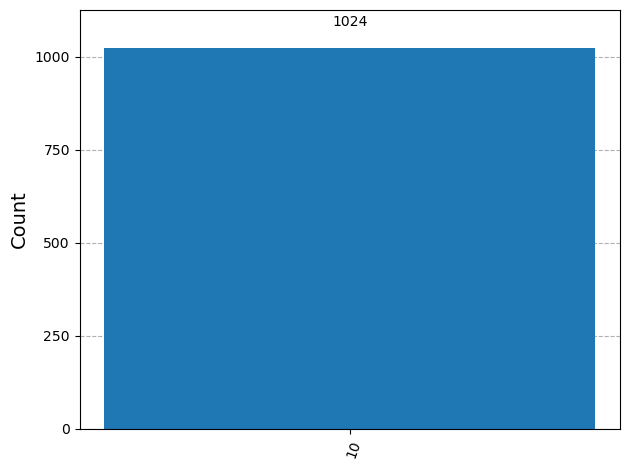

In [16]:
count=result.get_counts()
print("Measurement results:", count)
plot_histogram(count)
plt.show()